# Data science project
https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501
https://medium.com/@sakshi.babbar/exploring-classification-algorithms-guide-to-select-the-right-model-for-your-data-73b08b187a01
https://christophm.github.io/interpretable-ml-book/simple.html
https://towardsdatascience.com/three-interpretability-methods-to-consider-when-developing-your-machine-learning-model-5bf368b47fac
https://en.wikipedia.org/wiki/Gradient_boosting
https://xgboost.readthedocs.io/en/stable/
https://christophm.github.io/interpretable-ml-book/

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns

import pickle as pkl
from sklearn import tree as tr

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [18]:

# Knowledge (KnowsCreche	KnowsCrecheA	KnowsCrechePub	KnowsAssMat	KnowsNotYet	KnowsJE	KnowsAutre	KnowsPartage	KnowsHG	KnowsNounou	KnowsNothing)
# KnownNbTypeECS

# WantCreche	WantCrecheA	WantAssMat	WantJE	WantAutre	WantPartage	WantHG	WantNounou


# SingleMum

#PsyStress	PsyComplicated	PsySatisfaction

0       30
1       36
2       29
3       43
4       40
        ..
1450    30
1451    36
1452    34
1453    30
1454    34
Name: Age, Length: 1455, dtype: int64

## Data curation

In [176]:

df = pd.read_csv("/Users/sylvainestebe/Code/data_child/data/dataset.csv")

data = {
# demographic data
        'Age': df.Age,
        'Region': df.Dep,
        'Postcode': df.CodePostalBaseline,
#        'NumberChildren' : df.NumberChildren,
        'SingleMom' : df.SingleMum,
# knowledge
        'NumberKnown' :df.KnownNbTypeECS,

# output
        'Intention' : df.Intention,
        'Applied' : df.ECSApp,
        'Use' : df.ECSUseYes
}
 
df = pd.DataFrame(data)

/var/folders/td/5r8mr8t14cn_c4w5c8ty48lw0000gn/T/ipykernel_61473/3063411514.py:1: DtypeWarning: Columns (96,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sylvainestebe/Code/data_child/data/dataset.csv")


In [177]:
# Replace "Yes" with 1 and "No" with 0 in the 'col_string' column
df.Intention = df.Intention.replace({'Yes': 1, 'No': 0})
df.SingleMom = df.SingleMom.replace({True:1,False:0})

In [178]:
# Look is there are Nan value
print(df.isna().sum())


Age            0
Region         0
Postcode       0
SingleMom      0
NumberKnown    0
Intention      0
Applied        0
Use            0
dtype: int64


## Explore dataset

<Axes: xlabel='Intention', ylabel='Count'>

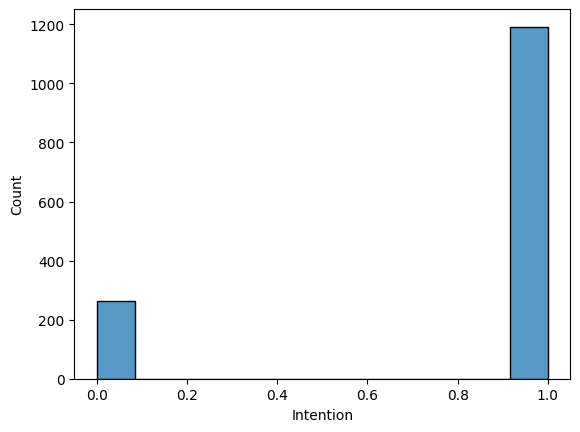

In [186]:
# Histograme
sns.histplot(df["Intention"])
# Boxplot
# Grouped by chart

## Question 1
As we can see in the histograme, there are few people would do not have the intention to applied. Can we classify which type of people?

In [ ]:
# exploration dataset

sns.histplot(df["Intention"])


https://chatgpt.com/c/4fc4b181-8d91-456f-a4d4-1cef2d01601a

In [187]:
## Train-Test

# X = df.iloc[:,:9].values
X = df.iloc[:,:5].values

# intention df.iloc[:,5]
# applied df.iloc[:,6]
# use/accepted df.iloc[:,7]

y = df.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = df.columns
    df.to_csv(f'../data/{name}.csv')

[False False False ... False False False]


### our models
- Model 0: predict alway one
- Model 1: predicting the `target` based on age, sex, and BMI and blood pressure
- Model 2: predicting the target based on measurements.


In [ ]:
mean_value = y_train.mean()
model_name = 'dummy'
for y,nsplit in zip([y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    performance = np.sqrt(mean_squared_error(y, 
                                             [mean_value]*y.shape[0]))
    r2 = r2_score(y, [mean_value]*y.shape[0])
    performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [ ]:
performances = []
## Model
# Logistic regression
# Decision trees
# Random forest/ Xboost
# Support vector machine
# K-nearest neigboor
# Naive bayes


In [199]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Evaluation
# F1

# binary classification
y_true_empty = [1, 1, 1, 1, 1, 0]
y_pred_empty = [1, 1, 1, 1, 1, 0]
f1_score(y_true_empty, y_pred_empty)

# recall

y_true = [1, 1, 1, 1, 1, 0]
y_pred = [1, 1, 1, 1, 1, 0]
recall_score(y_true, y_pred, average='binary')

# precision (maybe more important because we want predict the type of person who do not applied)

y_true = [1, 1, 1, 1, 1, 0]
y_pred = [1, 1, 1, 1, 1, 0]
precision_score(y_true, y_pred, average='binary')


1.0

In [ ]:
## model comparison

## Question 2 

https://johnfengphd.medium.com/multi-label-binary-classification-with-deep-learning-e59fcef20a5e
https://chatgpt.com/c/0667f7d8-b369-428a-8488-5f0654fe7452

In [ ]:
# split train-test

In [ ]:
# Model (multilabel)
# add neural network

# Train-Test split

In [171]:
# X = df.iloc[:,:9].values
X = df.iloc[:,:5].values

# intention df.iloc[:,5]
# applied df.iloc[:,6]
# use/accepted df.iloc[:,7]

y = df.iloc[:,5].values

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [173]:
for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = df.columns
    df.to_csv(f'../data/{name}.csv')

## Model

In [ ]:
performances = []

## Dummy model
https://medium.com/@eskandar.sahel/a-dummy-classifier-a-baseline-classifier-or-a-null-model-71df50fd8947#:~:text=A%20dummy%20classifier%2C%20also%20known,performance%20of%20more%20sophisticated%20models.

## Can we predict if a person will not have the intention?

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

- Tree
- Neural Network

In [174]:
from sklearn import tree


{'ccp_alpha': 0.01, 'max_depth': 1, 'min_samples_split': 11}
test RMSE:  0.37623464940848433


/Users/sylvainestebe/Code/nlp_project/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sylvainestebe/Code/nlp_project/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sylvainestebe/Code/nlp_project/.venv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/Users/sylvainestebe/Code/nlp_project/.venv/lib/python3.9/site-packages/sklearn/tree/_classes.py", 

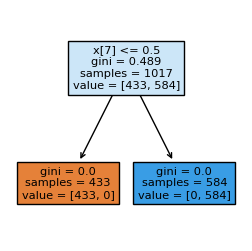

In [143]:
fig = plt.figure(figsize=(3,3))
_ = tr.plot_tree(tree_model, 
                 filled=True)

## Can we predict if a person have the intention if she will be accepted and applied?



https://xgboost.readthedocs.io/en/stable/
https://shap.readthedocs.io/en/latest/
https://www.educative.io/answers/classification-using-xgboost-in-python

# IDEAS 
- First simple : Classfication tasks with demographical data and different methods 
Question : 
- Given a person as the intention to use childcare can we predict if she will applied and be accept (2 output) (multiclass or two class)
- Second : Cluster, can we find cluster of people or not 
- Given some data can we find some similar cluster in the person

Both method use train,test,valid set and find relevant evaluation.
Can we interpret the data? Can we answer our question? Does a specific profile emerge?

- Third : Cluster latent analysis ...
https://www.sciencedirect.com/science/article/pii/S2215016122001273#:~:text=Latent%20Class%20Cluster%20Analysis%20(LCCA,%2C%20psychological%2C%20and%20educational%20research.

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics

# Structure 
Pipeline (Start simple):
- Datacuration
- Split (Train/Test/Validation)
- Question : Can we predict which category of people do not have the intention (one label) ? Can we predict a person which have the intention will applied? Will be accepted? (two label)
- Model (Dummy)
- Model (Neural Network)
- Model (Tree/Xboost)
- Model (??)
- Fit the model
- Evaluate the model (F1, Precision and Recall) 
- Optional : Can we find some cluster ? (exploratory)

Pipeline (Complexify):
- Use other data and try to find something consistent
- Add regularisation 


In [ ]:
# regularisation
# https://chatgpt.com/c/4fc4b181-8d91-456f-a4d4-1cef2d01601a

In [ ]:
# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
f1_score(y_true, y_pred, average=None)